## Study case for linear, L1, L2

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv("https://artyudinsitemedia.nyc3.cdn.digitaloceanspaces.com/housing.csv")

In [44]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [45]:
## Total room, not one house, the whole community

In [46]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [47]:
## Check the following
### 1. missing values
#### Option1: drop missing
#### Option2: fill with default value
#### Option3: fill with forward fill or backward fill # drag from previous
### 2. duplicates

In [48]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [49]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [50]:
df.shape

(20640, 10)

In [51]:
df.dropna(inplace=True)

In [52]:
## Check duplicates
df.duplicated().any()

False

### Feature Engineering

In [53]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
# Average Rooms per House
# Average Bedrooms per House
# No. of people per household

In [55]:
df["avg_rooms"] = df['total_rooms']/df['households']
df["avg_bedrooms"] = df["total_bedrooms"]/df['households']
df["ppl_per_household"] = df["population"]/df['households']

In [56]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,ppl_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


## EDA exploratory analysis

<AxesSubplot:>

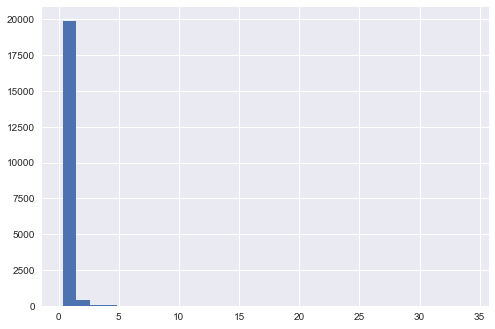

In [57]:
df['avg_bedrooms'].hist(bins=30)

<AxesSubplot:>

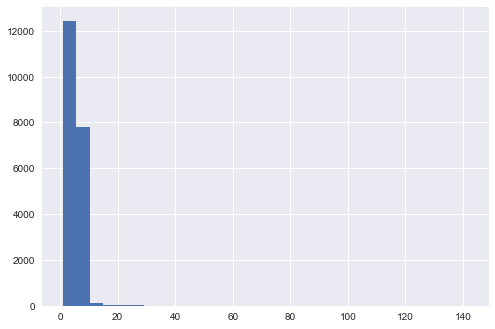

In [58]:
df['avg_rooms'].hist(bins=30)

In [59]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,ppl_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,1.097062,3.071533
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.476104,10.438269
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,1.006029,2.429032
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,1.048889,2.817582
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,1.099631,3.281513
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


(0.0, 10.0)

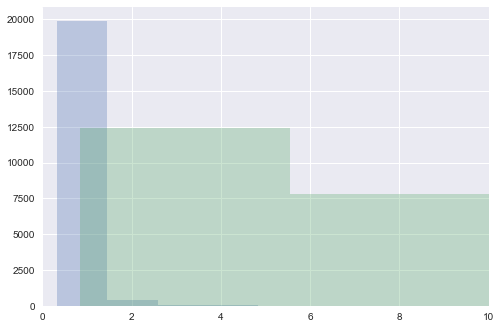

In [60]:
df['avg_bedrooms'].hist(bins=30, alpha=0.3)
df['avg_rooms'].hist(bins=30, alpha=0.3)
plt.xlim(0, 10)

In [61]:
df[df['avg_rooms']>4].count()[0]

17582

In [62]:
df[df['avg_rooms']<=4].count()[0]

2851

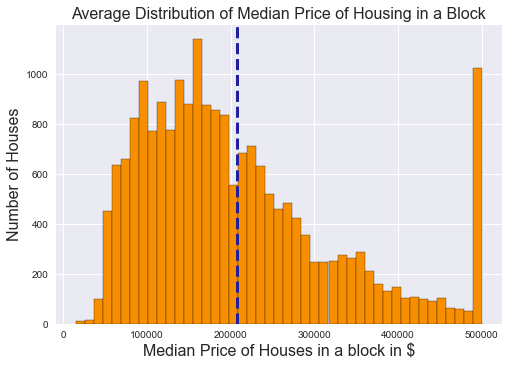

In [63]:
##### plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block');

In [64]:
df_new = df[df['median_house_value']<500000]
print(df.shape, df_new.shape)

(20433, 13) (19448, 13)


In [66]:
condition = df['median_house_value']>500000
index_of_values_drop = df.index[condition]
df.drop(index_of_values_drop, inplace=True)

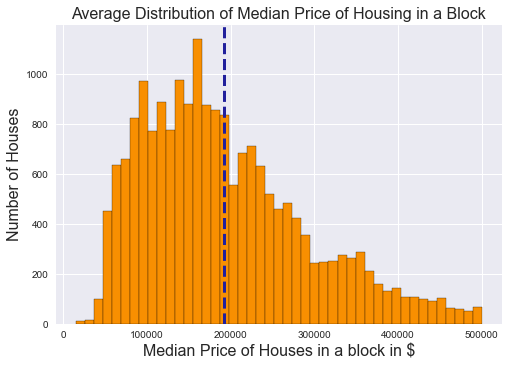

In [67]:
##### plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block');

In [78]:
np.zeros_like(df.corr())

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [81]:
mask = np.zeros_like(df.corr())

## mask = np.zeros(df.corr().shape)

In [82]:
## triangle upper indices, lower indices
### Based on mask take triangle indces
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True

In [83]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

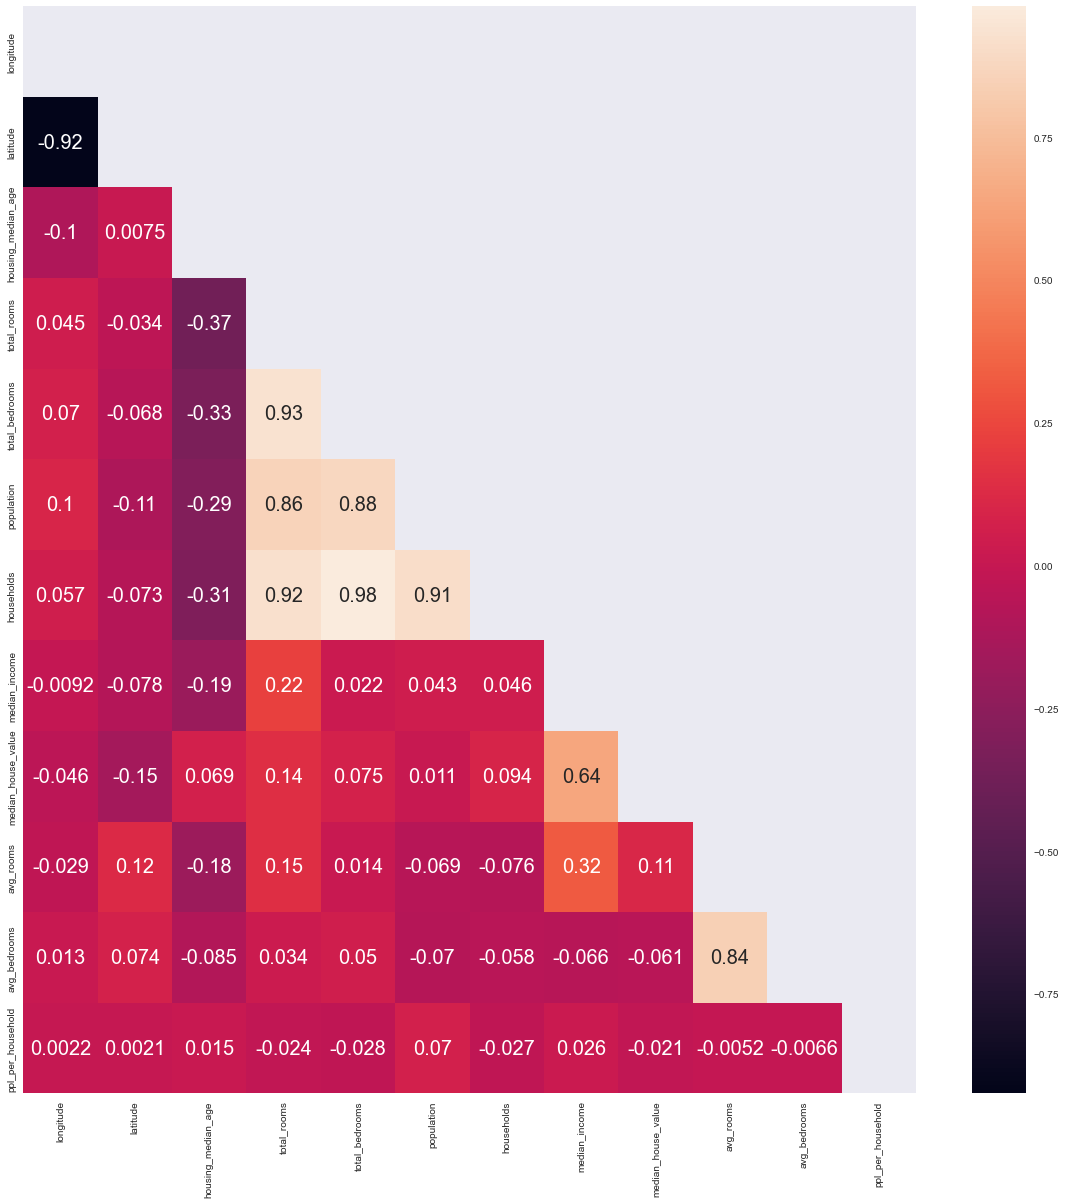

In [84]:
## Get correlation heatmap with seaborn
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, mask=mask, annot_kws={"fontsize":20})

In [85]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'avg_rooms', 'avg_bedrooms',
       'ppl_per_household'],
      dtype='object')

In [93]:
df = pd.get_dummies(df, "ocean_proximity")

In [95]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,ppl_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,0,1,0


In [98]:
help(df.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-l

In [101]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'avg_rooms', 'avg_bedrooms', 'ppl_per_household',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [108]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,ppl_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,0,1,0


In [131]:
X = df.drop(['median_house_value', 'longitude', 'latitude', 'total_rooms', \
            'total_bedrooms'], axis=1)
y = df['median_house_value']

print(X.head(5))

# scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# split
X_train, X_test, y_train, y_test = \
train_test_split(X_scaled,y, test_size=0.2)

# model
model = LinearRegression()
model.fit(X_train, y_train)

# score the test
print(model.score(X_test, y_test))

   housing_median_age  population  households  median_income  avg_rooms  \
0                41.0       322.0       126.0         8.3252   6.984127   
1                21.0      2401.0      1138.0         8.3014   6.238137   
2                52.0       496.0       177.0         7.2574   8.288136   
3                52.0       558.0       219.0         5.6431   5.817352   
4                52.0       565.0       259.0         3.8462   6.281853   

   avg_bedrooms  ppl_per_household  ocean_proximity_<1H OCEAN  \
0      1.023810           2.555556                          0   
1      0.971880           2.109842                          0   
2      1.073446           2.802260                          0   
3      1.073059           2.547945                          0   
4      1.081081           2.181467                          0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
